In [50]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.patches as mpatches
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns
from urllib.request import urlopen
from PIL import Image
import warnings
warnings.filterwarnings("ignore")

In [29]:
df=pd.read_csv('winter.csv')

In [30]:
df

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold
...,...,...,...,...,...,...,...,...,...
5765,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze
5766,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold
5767,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver
5768,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold


In [31]:
df.shape

(5770, 9)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5770 entries, 0 to 5769
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        5770 non-null   int64 
 1   City        5770 non-null   object
 2   Sport       5770 non-null   object
 3   Discipline  5770 non-null   object
 4   Athlete     5770 non-null   object
 5   Country     5770 non-null   object
 6   Gender      5770 non-null   object
 7   Event       5770 non-null   object
 8   Medal       5770 non-null   object
dtypes: int64(1), object(8)
memory usage: 405.8+ KB


In [33]:
df.describe(include=object)

,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
count,5770,5770,5770,5770,5770,5770,5770,5770
unique,19,7,15,3761,45,2,83,3
top,Sochi,Skiing,Ice Hockey,"BJOERNDALEN, Ole Einar",USA,Men,Ice Hockey,Silver
freq,612,1781,1536,13,653,3944,1536,1930


# ***1-The city that won the most of the three medals***

In [34]:
df['Country'].unique()

array(['FRA', 'SUI', 'FIN', 'BEL', 'GBR', 'SWE', 'CAN', 'USA', 'AUT',
       'NOR', 'GER', 'TCH', 'HUN', 'ITA', 'FRG', 'NED', 'URS', 'EUA',
       'JPN', 'POL', 'PRK', 'ROU', 'GDR', 'ESP', 'LIE', 'BUL', 'YUG',
       'EUN', 'KOR', 'CHN', 'LUX', 'NZL', 'RUS', 'UKR', 'BLR', 'AUS',
       'SLO', 'KAZ', 'UZB', 'DEN', 'CZE', 'CRO', 'EST', 'LAT', 'SVK'],
      dtype=object)

In [35]:
city_counts = df['Country'].value_counts()
print(city_counts)


Country
USA    653
CAN    625
NOR    457
URS    440
FIN    434
SWE    433
GER    360
SUI    285
AUT    280
RUS    263
ITA    192
GDR    162
TCH    158
FRA    152
NED    122
FRG     94
KOR     87
CHN     82
GBR     79
CZE     75
JPN     63
EUN     60
POL     27
EUA     21
SLO     18
LAT     15
BLR     15
AUS     15
BEL     13
HUN     12
CRO     11
UKR     11
LIE      9
YUG      7
EST      7
KAZ      7
BUL      6
DEN      5
SVK      5
LUX      2
ESP      2
ROU      2
PRK      2
UZB      1
NZL      1
Name: count, dtype: int64


In [36]:
df['Medal'].value_counts()

Medal
Silver    1930
Gold      1921
Bronze    1919
Name: count, dtype: int64

In [37]:
medal_country_counts = df.groupby('Medal')['Country'].value_counts().groupby(level=0).nlargest(1)
print(medal_country_counts)


Medal   Medal   Country
Bronze  Bronze  FIN        221
Gold    Gold    CAN        315
Silver  Silver  USA        319
Name: count, dtype: int64


# ***2-Years in which China won the Bronze medal***

In [38]:
df[(df['Country'] == 'CAN') & (df['Medal'] == 'Bronze')][['Year', 'Medal']]

,Year,Medal
287,1932,Bronze
299,1932,Bronze
302,1932,Bronze
305,1932,Bronze
308,1932,Bronze
...,...,...
5504,2014,Bronze
5535,2014,Bronze
5592,2014,Bronze
5699,2014,Bronze


# ***3-Years in which France won the Silver medal***

In [39]:
df[(df['Country'] == 'FRA') & (df['Medal'] == 'Silver')][['Year', 'Medal']]

,Year,Medal
543,1948,Silver
1089,1964,Silver
1128,1964,Silver
1136,1964,Silver
1143,1964,Silver
1327,1968,Silver
1330,1968,Silver
1336,1968,Silver
1542,1972,Silver
2186,1984,Silver


# ***4-Years in which Japan won the gold medal***

In [40]:
df[(df['Country'] == 'JPN') & (df['Medal'] == 'Gold')][['Year', 'Medal']]

,Year,Medal
1586,1972,Gold
2803,1992,Gold
2804,1992,Gold
2805,1992,Gold
3146,1994,Gold
3147,1994,Gold
3148,1994,Gold
3447,1998,Gold
3477,1998,Gold
3570,1998,Gold


# ***5-Which city hosted the most number of events?***

In [41]:
most_events_city = df['City'].value_counts().idxmax()
print("City with the most events:", most_events_city)


City with the most events: Sochi


# ***6-What is the gender distribution of athletes in the dataset?***

In [42]:
gender_distribution = df['Gender'].value_counts()
gender_distribution


Gender
Men      3944
Women    1826
Name: count, dtype: int64

# ***7-Name of the athlete who has won the most medals (gold, silver, and bronze combined)***

In [43]:

df['Total Medals'] = df.groupby('Athlete')['Medal'].transform('count')
most_medals_athlete = df.loc[df['Total Medals'].idxmax()]['Athlete']
print("Athlete with the most medals (gold, silver, and bronze combined):", most_medals_athlete)


Athlete with the most medals (gold, silver, and bronze combined): BJOERNDALEN, Ole Einar


# ***8-Top 10 Athletes by Total Medals Won'***

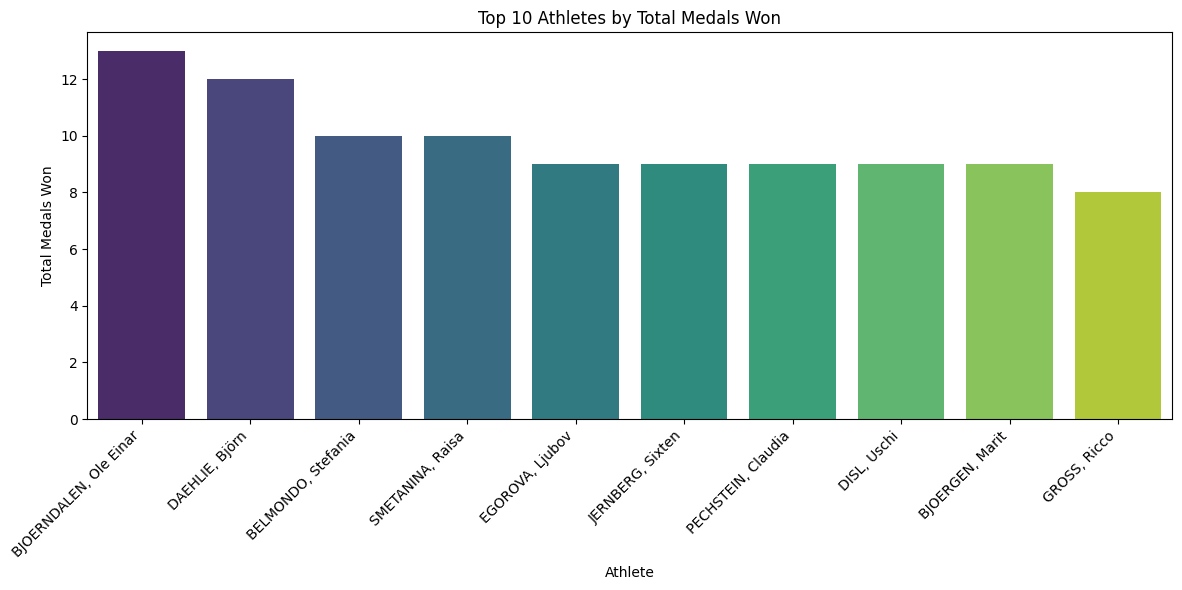

In [44]:
athlete_medal_counts = df.groupby(['Athlete', 'Medal']).size().unstack(fill_value=0)

athlete_medal_counts['Total Medals'] = athlete_medal_counts.sum(axis=1)

athlete_medal_counts = athlete_medal_counts.sort_values(by='Total Medals', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=athlete_medal_counts.index[:10], y='Total Medals', data=athlete_medal_counts[:10], palette='viridis')
plt.title('Top 10 Athletes by Total Medals Won')
plt.xlabel('Athlete')
plt.ylabel('Total Medals Won')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# ***9-Distribution of Medals by Country***

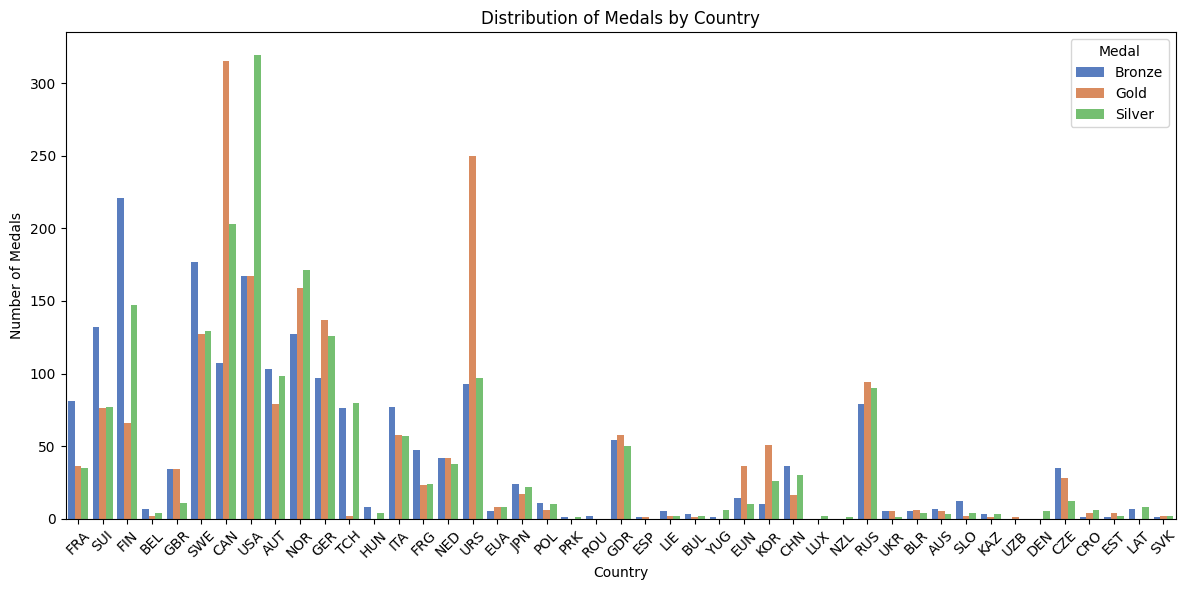

In [45]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Country', hue='Medal', data=df, palette='muted')
plt.title('Distribution of Medals by Country')
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)
plt.legend(title='Medal')
plt.tight_layout()
plt.show()

# ***10-Distribution of Medals by Sport***

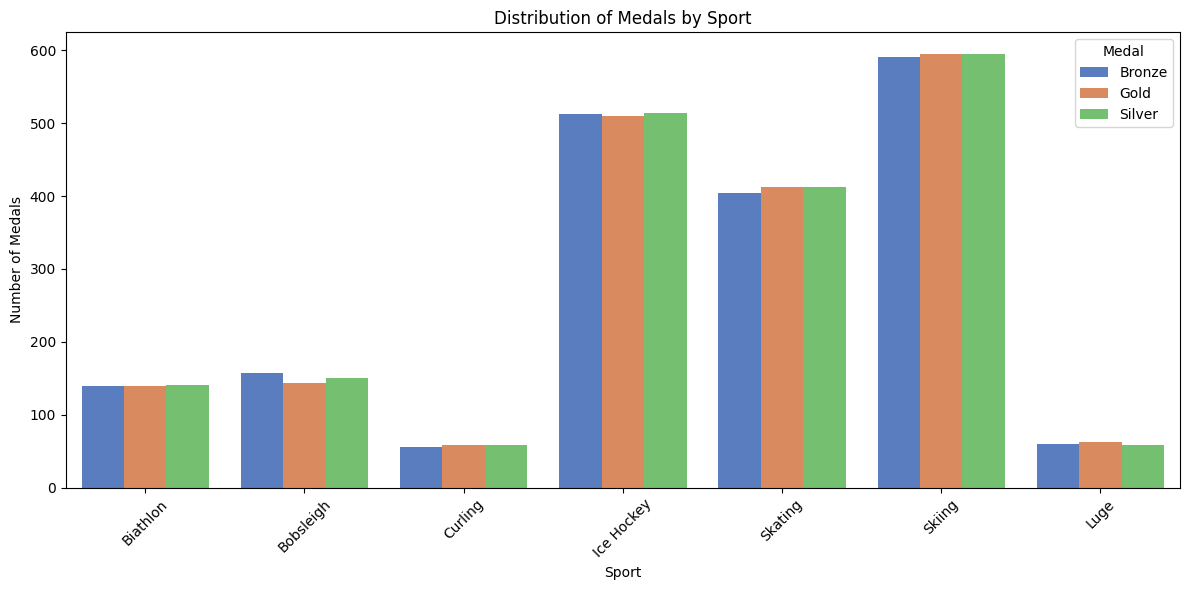

In [46]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Sport', hue='Medal', data=df, palette='muted')
plt.title('Distribution of Medals by Sport')
plt.xlabel('Sport')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)
plt.legend(title='Medal')
plt.tight_layout()
plt.show()

# ***11-Distribution of Medals by Gender***

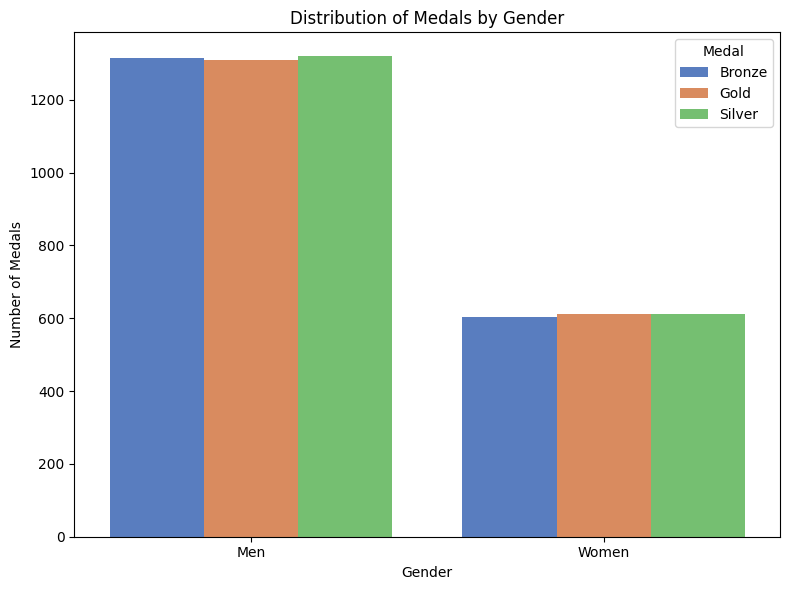

In [47]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Medal', data=df, palette='muted')
plt.title('Distribution of Medals by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Medals')
plt.legend(title='Medal')
plt.tight_layout()
plt.show()

# ***12-Distribution of Medals Over Time***

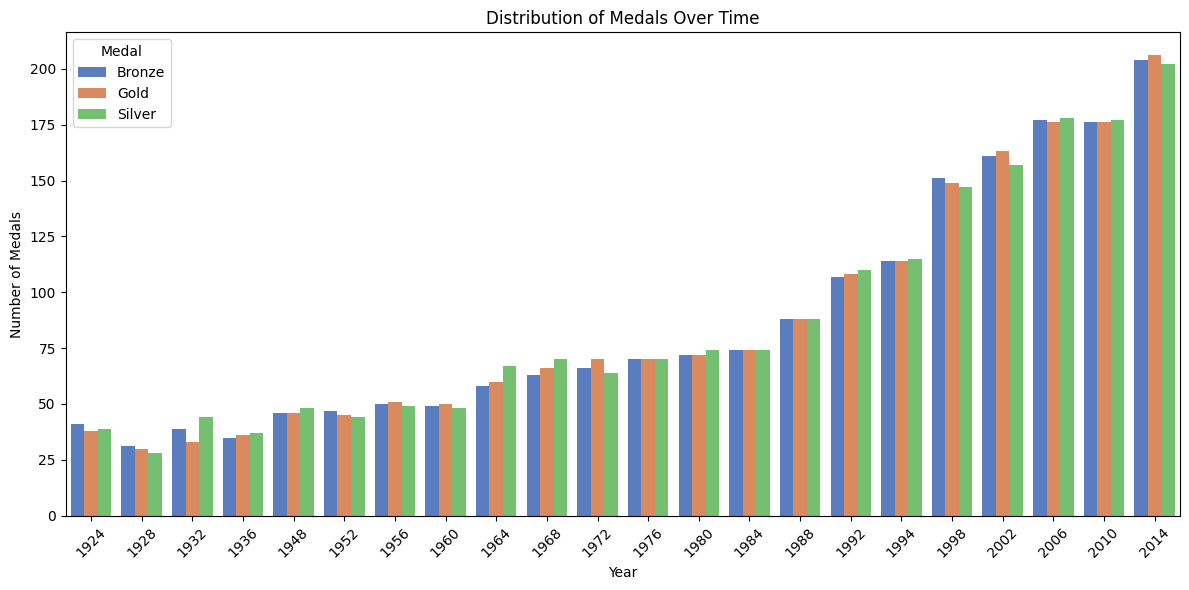

In [48]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', hue='Medal', data=df, palette='muted')
plt.title('Distribution of Medals Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)
plt.legend(title='Medal')
plt.tight_layout()
plt.show()

# ***13-Top event***

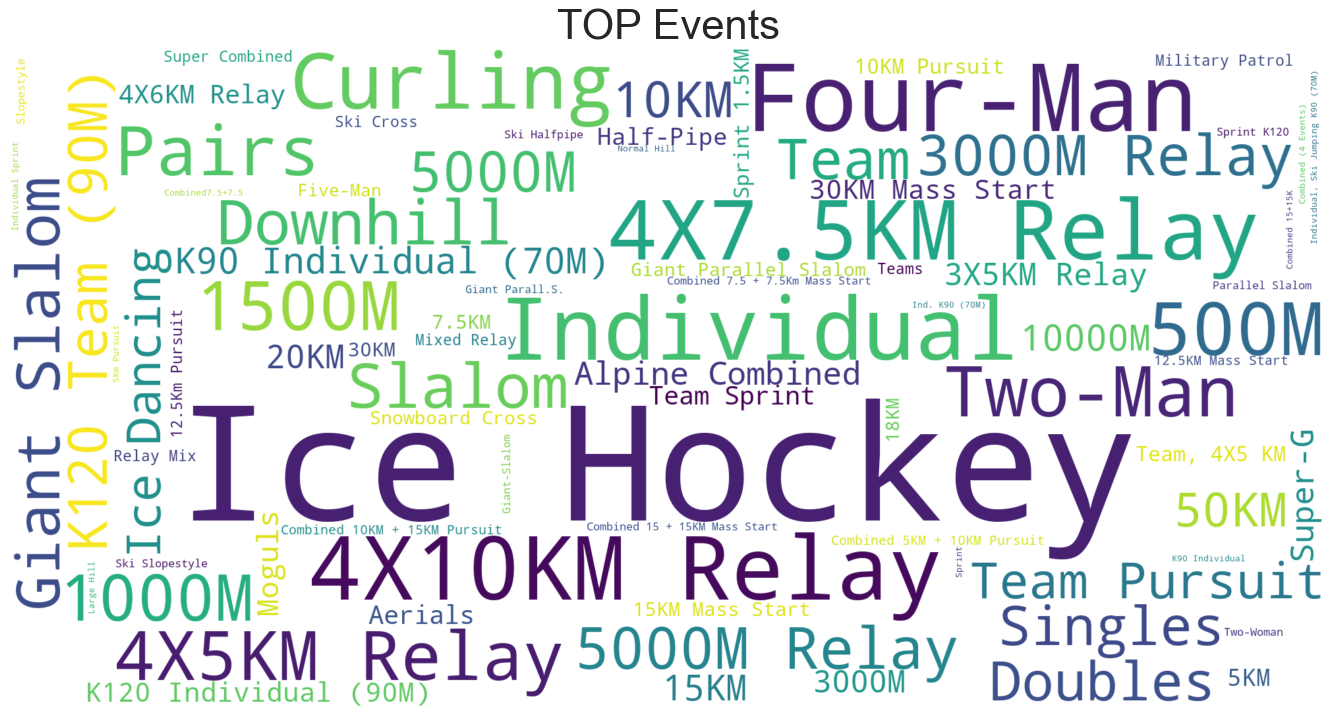

In [52]:
count_discipline = df.Event.value_counts()
count_discipline

sns.set_style("ticks")

wordcloud = WordCloud(
                    width=2000,
                    height=1000, 
                    scale=1,
                    normalize_plurals=False,
                    repeat=False,
                    random_state=42,
                    background_color='white')

wordcloud.generate_from_frequencies(frequencies = count_discipline)
plt.figure(figsize=(17,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('TOP Events', fontsize = 30)
plt.show()